<a href="https://colab.research.google.com/github/Seungkyu-Han/colab_ml/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_california_housing
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

boston = fetch_california_housing()

boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

boston_df['PRICE'] = boston.target
print('Boston 데이터셋 크기: ', boston_df.shape)
boston_df.head()

Boston 데이터셋 크기:  (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


- 각 컬럼별로 주택가격에 미치는 영향도를 조사

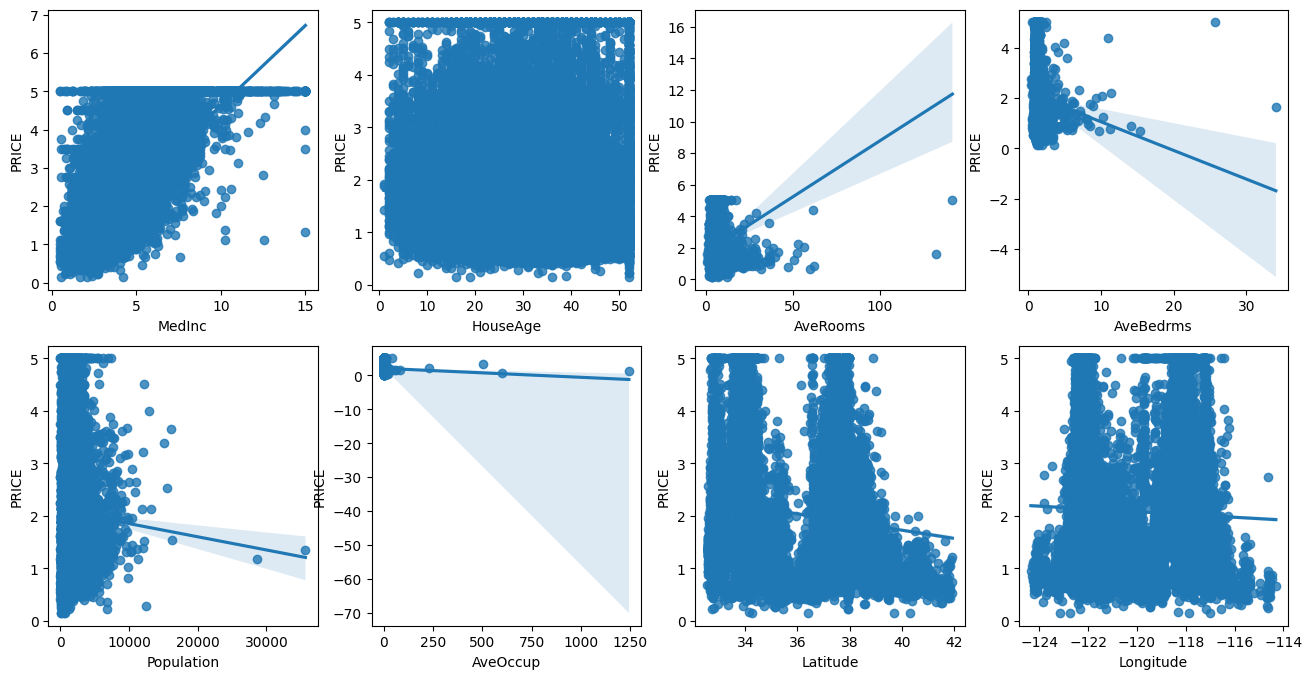

In [ ]:
flg, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

### 학습과 테스트 데이터 세트로 분리하고 학습/예측/평가 수행

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['PRICE']
x_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE {mse}, RMSE {rmse}, variance score: {r2_score(y_test, y_preds)}')

MSE 0.5427375001577459, RMSE 0.7367072011034953, variance score: 0.5952253366499449


In [ ]:
print('절편 값: ', lr.intercept_)
print('회귀 계수값: ', np.round(lr.coef_, 1))

절편 값:  -37.239053052941664
회귀 계수값:  [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]


In [ ]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=x_data.columns)
coeff.sort_values(ascending=False)

,0
AveBedrms,0.6
MedInc,0.4
HouseAge,0.0
Population,-0.0
AveOccup,-0.0
AveRooms,-0.1
Latitude,-0.4
Longitude,-0.4


In [ ]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
x_data = boston_df.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(np.round(neg_mse_scores))
print(np.round(rmse_scores, 2))
print(avg_rmse)

[-0. -1. -1. -1. -0.]
[0.7  0.79 0.8  0.74 0.7 ]
0.7459068363518109


### Polynomial Regression 이해

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

x = np.arange(4).reshape(2, 2)
print('일차 단항식 계수: ', x)

poly = PolynomialFeatures(degree=2)
poly.fit(x)
poly_ftr = poly.transform(x)
print('변환된 2차 다항식 계수: ', poly_ftr)

일차 단항식 계수:  [[0 1]
 [2 3]]
변환된 2차 다항식 계수:  [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


### 3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성.
### 즉 회귀식 결정값 y = 1 + 2x_1 + 3x_1^2 + 4x_2^3

In [ ]:
def polynomial_func(x):
  y = 1 + 2 * x[:, 0] + 3 * x[:, 0] ** 2 + 4*x[:, 1] ** 3
  return y

x = np.arange(0, 4).reshape(2, 2)

print('일차 단항식 계수: \n', x)

y = polynomial_func(x)

print('3차 다항식 결정값: \n', y)

poly_ftr = PolynomialFeatures(degree=3).fit_transform(x)
print('3차 다항식 계수: \n', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape', model.coef_.shape)

일차 단항식 계수: 
 [[0 1]
 [2 3]]
3차 다항식 결정값: 
 [  5 125]
3차 다항식 계수: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape (10,)


### 사이킷런의 Pipeline을 사용하여 3차 다항회귀 학습

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(x):
  y = 1 + 2 * x[:, 0] + 3 * x[:, 0] ** 2 + 4*x[:, 1] ** 3
  return y

model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=True)), ('linear', LinearRegression())])
x = np.random.rand(1000, 2)
y = polynomial_func(x)


model = model.fit(x, y)
print('Polynomial 회귀 계수: \n', np.round(model.named_steps['linear'].coef_, 2))
print(model.named_steps['linear'].intercept_)

Polynomial 회귀 계수: 
 [ 0.  2.  0.  3.  0. -0. -0.  0. -0.  4.]
0.9999999999999996


### 다항 회귀를 이용한 보스턴 주택가격 예측

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np

california = fetch_california_housing()

california_df = pd.DataFrame(boston.data, columns=boston.feature_names)

california_df['PRICE'] = boston.target

print('california 데이터셋 크기: ', california_df.shape)

y_target = boston_df['PRICE']
x_data = boston_df.drop(['PRICE'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=156)

p_model = Pipeline(
    [('poly', PolynomialFeatures(degree=2, include_bias=False)),
     ('linear', LinearRegression())]
)

p_model.fit(x_train, y_train)
y_preds = p_model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0: 3f}, RMSE: {1: .3f}'.format(mse, rmse))
print('variance score: ', r2_score(y_test, y_preds))

california 데이터셋 크기:  (20640, 9)
MSE:  81.058511, RMSE:  9.003
variance score:  -59.45359255401349


### 다항회귀에서 과소적합, 과적합 이해

cosine 곡선에 약간의 noise 변동값을 더해서 실제값 곡선을 만듦

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

def true_fun(x):
  return np.cos(1.5 * np.pi * x)

np.random.seed(0)
n_samples = 30

x = np.sort(np.random.rand(n_samples))

y = true_fun(x) + np.random.rand(n_samples) * 0.1

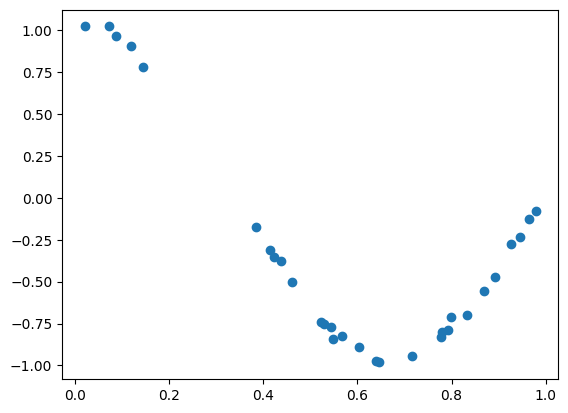

In [ ]:
plt.scatter(x, y)

Degree 1 회귀 계수는 [-1.52]입니다.
Degree 1 MSE는 0.38559805246752143
Degree 4 회귀 계수는 [  1.74 -22.98  31.58 -11.24]입니다.
Degree 4 MSE는 0.005719308263123808
Degree 15 회귀 계수는 [ 1.20140000e+02 -3.59870000e+03  5.21443400e+04 -4.14472980e+05
  1.80865858e+06 -3.37977203e+06 -6.02740547e+06  5.58455564e+07
 -1.69830273e+08  3.08634288e+08 -3.68970992e+08  2.93850756e+08
 -1.50697972e+08  4.51481187e+07 -6.01515605e+06]입니다.
Degree 15 MSE는 42897776.31805821


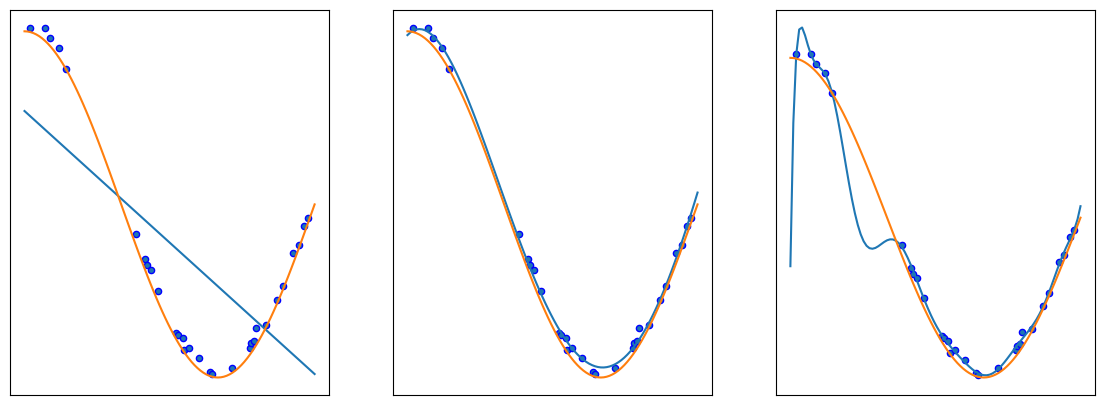

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i + 1)
  plt.setp(ax, xticks=(), yticks=())

  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()

  pipeline = Pipeline(
      [("polynomial_features", polynomial_features), ("linear_regression", linear_regression)]
  )

  pipeline.fit(x.reshape(-1, 1), y)

  scores = cross_val_score(pipeline, x.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
  coefficients = pipeline.named_steps['linear_regression'].coef_

  print(f'Degree {degrees[i]} 회귀 계수는 {np.round(coefficients, 2)}입니다.')
  print(f'Degree {degrees[i]} MSE는 {-1 * np.mean(scores)}')

  x_test = np.linspace(0, 1, 100)

  plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]), label="Model")

  plt.plot(x_test, true_fun(x_test), label="True function")
  plt.scatter(x, y, edgecolors='b', s=20, label='Samples')


plt.show()